In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
import datetime
import seaborn as sns # Seaborn plotting style
from scipy.stats import linregress
from matplotlib.dates import DateFormatter
script_dir = '../EcoV2'
import sys
import os
sys.path.append(os.path.abspath(script_dir))
from EcoRevCore import ecoRead
sns.set_style("darkgrid")

In [7]:
fpath = '../Data/B206/'

froot = 'Bouss_09_12_2020_'
skip = 1

# SELECT: ascent or descent
dir = 'asc'
dir = 'desc'  

# Calibration Coefficients

# ECO V1 SN 52147
EcoV1_chl_470_slope = 0.0073
EcoV1_chl_470_dark = 45

# ECO V1 SN 52147
# E3x1m_chl_440_slope = 0.0073
# E3x1m_chl_440_dark = 47
E3x1m_chl_470_slope = 0.0073
E3x1m_chl_470_dark = 49
# E3x1m_chl_532_slope = 0.0073
# E3x1m_chl_532_dark = 50

# Eco.V2 B206
b206_chl_470_slope = 0.004336614
b206_chl_470_dark = 52
b206_chl_440_slope = 0.00713441
b206_chl_440_dark = 55


# Read the eco data
fn = fpath+froot+dir+'_ecov2.csv'
dfeco = ecoRead(fn,
    usecols=[0, 1, 16,17,18, 19,20,21, 23,24,25, 29,31, 33,35, 37,39, 41,43], 
    names=['p','time', 'month', 'day', 'year', 'fluo_flbb', 'bb700', 'cdom', 'fluo_440', 'fluo_470', 'fluo_532', 'chl_470HG','chl_470LTC','bb_700HG','bb_700LTC', 'chl_440HG', 'chl_440LTC', 'fdomHG','fdomLTC'],
    sep=',',
    skiprows=skip,
    splitDate='boussole2020')
dfeco['dir'] = dir

dfeco['chl_470']  = (dfeco['chl_470HG'] - b206_chl_470_dark)*b206_chl_470_slope
dfeco['chl_440']  = (dfeco['chl_440HG'] - b206_chl_440_dark)*b206_chl_440_slope
dfeco['chl_440_adjusted']  = (dfeco['chl_440HG'] - b206_chl_440_dark)*b206_chl_440_slope/1.426
dfeco['chl_470_flbb'] = (dfeco['fluo_flbb'] - EcoV1_chl_470_dark)*EcoV1_chl_470_slope
dfeco['chl_470_3x1m'] = (dfeco['fluo_470']  - E3x1m_chl_470_dark)*E3x1m_chl_470_slope

# Read the CTD data
fn = fpath+froot+dir+'_ctd.csv'
dfctd = ecoRead(fn,
    usecols=[0, 1, 2, 5, 9, 16,17,18], 
    names=['p', 'time', 'T', 'fluo_chl', 'S',  'month', 'day', 'year'],
    sep=',',
    skiprows=skip,
    splitDate='boussole2020')
dfctd['dir'] = dir


#Interpolate sparse T,P data onto ECO timebase
# dfe = pd.concat([df128,df129])
# te = dfe.index.values.astype(float)
# ts = dfs.index.values.astype(float)
# Ps = dfs.P
# Pi = np.interp(te, ts, Ps)
# dfe['P'] = -Pi
# Ts = dfs['T']
# Ti = np.interp(te, ts, Ts)
# dfe['P'] = -Pi
# dfe['T'] = Ti
# dfe['t'] = (te-te[0])/1e9  # convert to zero-based seconds

# # Split them up again since sns FacetGrid isn't working
# df128 = dfe.loc[dfe['SN']=='B128'] 
# df129 = dfe.loc[dfe['SN']=='B129'] 

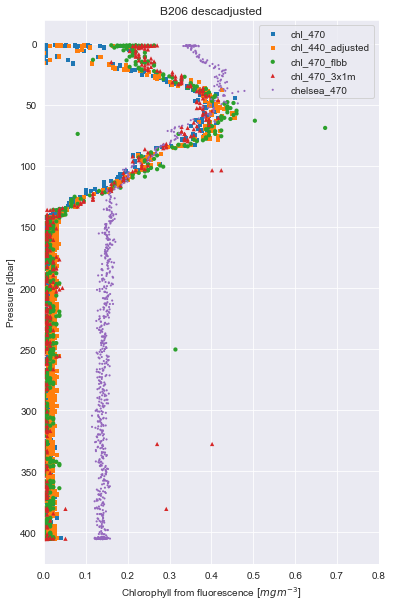

In [5]:
# Engineering Units Plots

# Channel names
ctd_470='fluo_chl'

ecoV1_chl_470='chl_470_flbb'
ecoV2_chl_470='chl_470'  
# ecoV2_chl_440='chl_440'  
ecoV2_chl_440='chl_440_adjusted'  
e3x1m_chl_470='chl_470_3x1m'

ecoV1_470='chl_flbb'
ecoV2_470='chl_470'  
ecoV2_440='chl_440'  
e3x1m_470='chl_3x1m'
e3x1m_470='fluo_470'  
e3x1m_440='fluo_440'  
e3x1m_532='fluo_532'  

# Plotting
fig = plt.figure(figsize=(6,10))

vars = [ecoV2_chl_470, ecoV2_chl_440, ecoV1_chl_470, e3x1m_chl_470]
marks  = ['s', 's', 'o', '^']

for varx,mark in zip(vars, marks) :
    h = sns.scatterplot(data=dfeco, x=varx,  y="p", edgecolor='none', marker=mark, label=varx, size=1)
h = sns.scatterplot(data=dfctd, x=ctd_470,  y="p", edgecolor='none', marker='.', label='chelsea_470', size=1)

axes=[]
axes.append(h.axes)
nax = 0
hl,l = axes[nax].get_legend_handles_labels()
plt.legend(hl[0:-1:2], l[0:-1:2])
axes[nax].invert_yaxis()
axes[nax].set_title('B206'+" "+dir+'adjusted')
# axes[nax].legend(labels=vars.append('fluo_chl'))
# axes[nax].set_title('B206'+" "+dir+' adjusted')
# axes[nax].legend(labels=[ecoV2_470, ecoV2_440+"/1.43", ctd_470])
axes[nax].set_xlabel(r'Chlorophyll from fluorescence $[mg m^{-3}]$')
axes[nax].set_ylabel('Pressure [dbar]')
axes[nax].set_xlim([0,0.8])


plt.show()

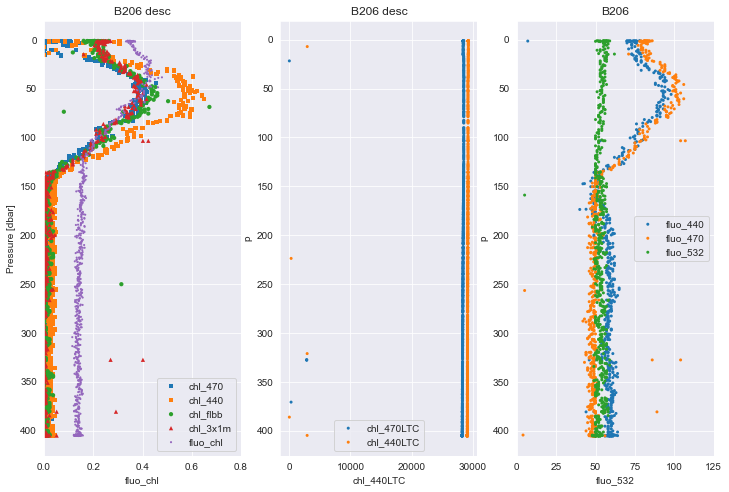

In [317]:
# Engineering Units, LTC, Counts
# Channel names
ctd_470='fluo_chl'

ecoV1_chl_470='chl_470_flbb'
ecoV2_chl_470='chl_470'  
ecoV2_chl_440='chl_440'  
e3x1m_chl_470='chl_470_3x1m'

ecoV1_470='chl_flbb'
ecoV2_470='chl_470'  
ecoV2_440='chl_440'  
e3x1m_470='chl_3x1m'
e3x1m_470='fluo_470'  
e3x1m_440='fluo_440'  
e3x1m_532='fluo_532'  

# Plotting
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(12,8))

# CTD fluorometer + Eco.V2 B206
nax = 0
# sns.scatterplot(ax=axes[nax], data=dfeco, x=ecoV2_470,  y="p", edgecolor='none', marker='.')
# sns.scatterplot(ax=axes[nax], data=dfeco, x=ecoV2_440,  y="p", edgecolor='none', marker='.')
# sns.scatterplot(ax=axes[nax], data=dfctd, x=ctd_470,  y="p", edgecolor='none', marker='.')

vars = [ecoV2_chl_470, ecoV2_chl_440, ecoV1_chl_470, e3x1m_chl_470]
marks  = ['s', 's', 'o', '^']

for varx,mark in zip(vars, marks) :
    h = sns.scatterplot(ax=axes[nax], data=dfeco, x=varx,  y="p", edgecolor='none', marker=mark, label=varx, size=1)
h = sns.scatterplot(ax=axes[nax], data=dfctd, x=ctd_470,  y="p", edgecolor='none', marker='.', label=ctd_470, size=1)

# B206 LTC (forward voltage) on Chl_470 and Chl_440 LEDs
nax = nax + 1
sns.scatterplot(ax=axes[nax], data=dfeco, x=ecoV2_470+"LTC", y="p", edgecolor='none', marker='.')
sns.scatterplot(ax=axes[nax], data=dfeco, x=ecoV2_440+"LTC", y="p", edgecolor='none', marker='.')

# Eco.V1 and Eco.3X1M
nax = nax + 1
# sns.scatterplot(ax=axes[nax], data=dfeco, x=ecoV1_470,  y="p", edgecolor='none', marker='.')
sns.scatterplot(ax=axes[nax], data=dfeco, x=e3x1m_440,  y="p", edgecolor='none', marker='.')
sns.scatterplot(ax=axes[nax], data=dfeco, x=e3x1m_470,  y="p", edgecolor='none', marker='.')
sns.scatterplot(ax=axes[nax], data=dfeco, x=e3x1m_532,  y="p", edgecolor='none', marker='.')
# sns.scatterplot(ax=axes[nax], data=dfctd, x="T",  y="p", edgecolor='none', marker='.', color='r')
# ax2 = axes[nax].twiny()
# sns.scatterplot(ax=ax2, data=dfctd, x="S",  y="p", edgecolor='none', marker='.')

nax = 0
hl,l = axes[nax].get_legend_handles_labels()
axes[nax].legend(hl[0:-1:2], l[0:-1:2])
axes[nax].invert_yaxis()
axes[nax].set_title('B206'+" "+dir)
# axes[nax].legend(labels=vars.append('fluo_chl'))
# axes[nax].set_title('B206'+" "+dir+' adjusted')
# axes[nax].legend(labels=[ecoV2_470, ecoV2_440+"/1.43", ctd_470])
axes[nax].set_ylabel('Pressure [dbar]')
axes[nax].set_xlim([0,0.8])

nax = nax + 1
axes[nax].invert_yaxis()
axes[nax].set_title('B206'+ " "+dir)
axes[nax].legend(loc='lower center', labels=[ecoV2_470+"LTC", ecoV2_440+"LTC"])

nax = nax + 1
axes[nax].set_title('B206')
axes[nax].legend(labels=[e3x1m_440, e3x1m_470, e3x1m_532])
axes[nax].invert_yaxis()
axes[nax].set_xlim([0,125])


plt.show()

1.4264275483313786 0.019458605049309352 0.992849803933596 9.87261495260733e-246 0.01055505399752738


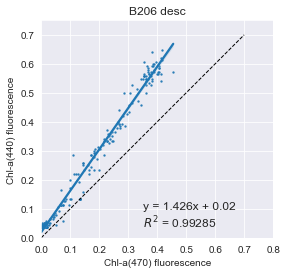

In [204]:
# Linear regression of Chl_440 vs. chl_470
varx = dfeco['chl_470']
vary = dfeco['chl_440']
mask = ~np.isnan(varx) & ~np.isnan(vary) & (vary >= 0.03) & (vary >= 0.03) & (varx < 0.7) & (vary < 0.7)
varx = varx[mask]
vary = vary[mask]
slope, intercept, r_value, p_value, std_err = linregress(varx, vary)
print(slope, intercept, r_value, p_value, std_err)

# Plot it
h = plt.figure()

maxxy = 0.7
ax = sns.lineplot(x=[0,maxxy],y=[0, maxxy], color='k', linewidth=1)
ax.lines[0].set_linestyle("--")

ax = sns.regplot(x=varx, y=vary, scatter_kws={'s':2})
ax.set(xlabel='Chl-a(470) fluorescence', ylabel='Chl-a(440) fluorescence')

plt.axis('square')
plt.xlim([0,0.75])
plt.ylim([0,0.75])
yticks = ax.get_yticks()
ax.set_xticks(yticks)

x = maxxy/2; y = vary[-1]  # annotation coordinates
plt.annotate(f'y = {float(slope):.3f}x + {float(intercept):.2f}\n$R^2$ = {r_value:.5f}', xy=(x,y), fontsize=12)
plt.title('B206'+" "+dir)
plt.show()

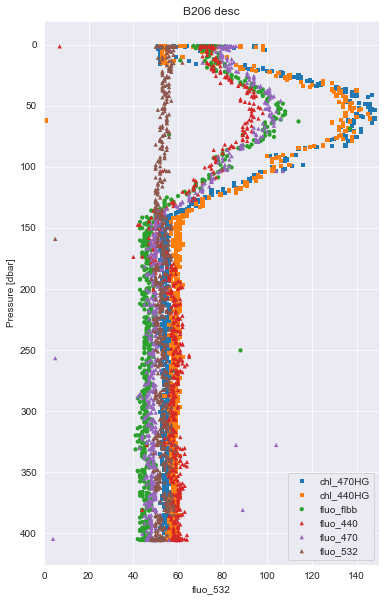

In [294]:
# Chl Channel Counts
# ctd_470='fluo_chl'

ecoV1_470='fluo_flbb'
ecoV2_470='chl_470HG'  
ecoV2_440='chl_440HG'  

e3x1m_470='fluo_470'
e3x1m_440='fluo_440'  
e3x1m_532='fluo_532'  

# Plotting
fig = plt.figure(figsize=(6,10))
#  Eco.V2 B206
vars = [ecoV2_470, ecoV2_440, ecoV1_470, e3x1m_440, e3x1m_470, e3x1m_532]
marks  = ['s', 's', 'o', '^', '^', '^']

for varx,mark in zip(vars, marks) :
    h = sns.scatterplot(data=dfeco, x=varx,  y="p", edgecolor='none', marker=mark, size=1,  label=varx)

ax = h.axes
hl,l = h.get_legend_handles_labels()
plt.legend(hl[0:-1:2], l[0:-1:2])
# ax.set_ylim([0,25])
ax.invert_yaxis()
ax.set_title('B206'+" "+dir)
ax.set_xlabel('Fluorescence [counts]')
ax.set_ylabel('Pressure [dbar]')
ax.set_xlim([0,150])

plt.show()

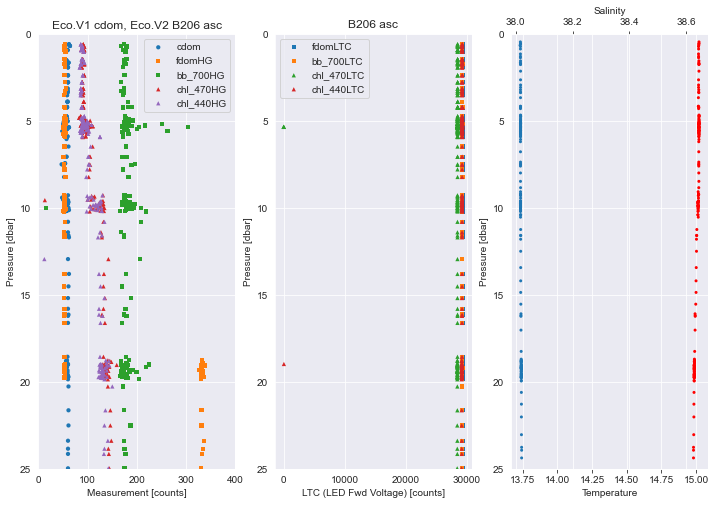

In [357]:
# CDOM / FDOM / Chl / BB Channel Counts

ecoV1_cdom='cdom'
ecoV2_fdom='fdom'  
ecoV2_bb700='bb_700'  
ecoV2_470='chl_470'  
ecoV2_440='chl_440'  
ylm = 25

# Plotting
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(12,8))

#  Eco.V1, Eco.V2 B206 channel counts
vars = [ecoV1_cdom, ecoV2_fdom+"HG", ecoV2_bb700+"HG", ecoV2_470+"HG", ecoV2_440+"HG"]
marks  = ['o', 's', 's', '^', '^']

nax = 0
for varx,mark in zip(vars, marks) :
    h = sns.scatterplot(ax=axes[nax], data=dfeco, x=varx,  y="p", edgecolor='none', marker=mark, size = 1, label=varx)

ax = axes[nax]
hl,l = h.get_legend_handles_labels()
h.legend(hl[0:-1:2], l[0:-1:2])
ax.set_xlim([0,400])
ax.set_ylim([0,ylm])
ax.invert_yaxis()
ax.set_title('Eco.V1 cdom, Eco.V2 B206'+" "+dir)
ax.set_xlabel('Measurement [counts]')
ax.set_ylabel('Pressure [dbar]')

#  Eco.V1, Eco.V2 B206 LTC (LED fwd voltage) counts
nax = nax + 1
vars = [ecoV2_fdom+"LTC", ecoV2_bb700+"LTC", ecoV2_470+"LTC", ecoV2_440+"LTC"]
marks  = ['s', 's', '^', '^']
for varx,mark in zip(vars, marks) :
    h = sns.scatterplot(ax=axes[nax], data=dfeco, x=varx,  y="p", edgecolor='none', marker=mark, size=1,  label=varx)

ax = axes[nax]
hl,l = h.get_legend_handles_labels()
h.legend(hl[0:-1:2], l[0:-1:2])
# ax.set_xlim([0,150])
ax.set_ylim([0,ylm])
ax.invert_yaxis()
ax.set_title('B206'+" "+dir)
ax.set_xlabel('LTC (LED Fwd Voltage) [counts]')
ax.set_ylabel('Pressure [dbar]')

# T, S
nax = nax + 1
ax = axes[nax]
sns.scatterplot(ax=ax, data=dfctd, x="T",  y="p", edgecolor='none', marker='.', color='r')
ax2 = axes[nax].twiny()
sns.scatterplot(ax=ax2, data=dfctd, x="S",  y="p", edgecolor='none', marker='.')

# ax.set_xlim([0,150])
ax.set_ylim([0,ylm])
ax.invert_yaxis()
ax.set_xlabel('Temperature')
ax2.set_xlabel('Salinity')
ax.set_ylabel('Pressure [dbar]')

plt.show()
